In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input,LSTM,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
# onenot encoding
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

# preprocess the data and normalisation
x_train=x_train.reshape((60000,28,28)).astype("float32")/255
x_test=x_test.reshape((10000,28,28)).astype("float32")/255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

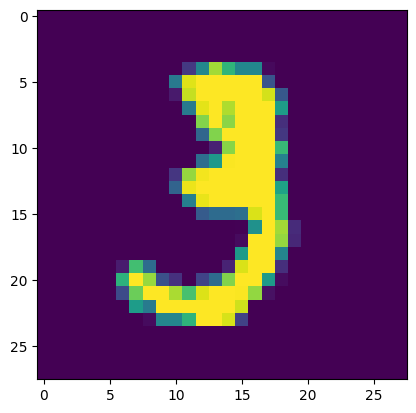

In [ ]:
plt.imshow(x_train[10])

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
inputs=Input(shape=(28,28))
rnn_layer=LSTM(128)(inputs)
outputs=Dense(10,activation='softmax')(rnn_layer)
model=Model(inputs=inputs,outputs=outputs)

In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(x_train,y_train,epochs=5,batch_size=64,validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.6993 - loss: 0.8993 - val_accuracy: 0.9471 - val_loss: 0.1715
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 87s 62ms/step - accuracy: 0.9529 - loss: 0.1585 - val_accuracy: 0.9646 - val_loss: 0.1123
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 75s 52ms/step - accuracy: 0.9695 - loss: 0.1012 - val_accuracy: 0.9734 - val_loss: 0.0908
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.9772 - loss: 0.0760 - val_accuracy: 0.9778 - val_loss: 0.0732
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9827 - loss: 0.0588 - val_accuracy: 0.9772 - val_loss: 0.0729


In [ ]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


In [ ]:
y_pred1=np.argmax(y_pred,axis=1)
print(len(y_pred1))

10000


In [ ]:
# from sklearn.metrics import acuuracy_score
test_loss,test_acc=model.evaluate(x_test,y_test)
print("test_acc: ",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9720 - loss: 0.0876
test_acc:  0.977400004863739
